# Basic Tensorflow with Linear Regression

Start by building a simple graph

In [1]:
import tensorflow as tf

a=tf.constant(1)
b=tf.constant(2)
c=tf.add(a,b)
print(c)

Tensor("Add:0", shape=(), dtype=int32)


If you run the above code, you would realize that nothng would happen as we are only building the graph or the blueprint. We need to run th created object in a session to actually run it.

In [2]:
sess=tf.Session()
valuec=sess.run(c)
print(valuec)

3


AS you can see output of the addition would only be materialized when it is run by a session.

Linear regression is trying to model a set of data [y,x] using a linear equation:
    y=Wx+b
where y is the dependent output result, x is the independent variable data, W is the weights parameters and b is the bias.

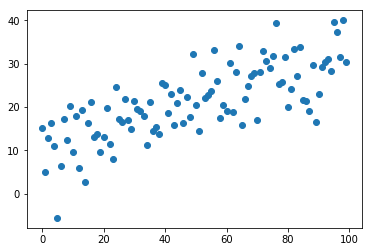

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 0 is the mean of the normal distribution you are choosing from
# 1.6 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise
noise_mean=10
noise_std=5.5
np.random.seed(seed=234)
noise = np.random.normal(noise_mean,noise_std,100)
#generating the training data
train_X=np.asarray(np.arange(0,100,1))
train_Y=0.2*train_X+0.6+noise
plt.scatter(train_X,train_Y)
plt.show()
n_samples = train_X.shape[0]

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

loss = tf.reduce_mean(tf.pow(pred - Y, 2)) / (2 * n_samples)
# Gradient descent
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Initializing the variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(loss, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "loss=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
        ww = sess.run(W)
        bb = sess.run(b)


Epoch: 0050 loss= 0.312069923 W= 0.289705 b= 1.79501
Epoch: 0100 loss= 0.291609824 W= 0.283044 b= 2.45423
Epoch: 0150 loss= 0.273983032 W= 0.276885 b= 3.06391
Epoch: 0200 loss= 0.258789212 W= 0.271188 b= 3.62777
Epoch: 0250 loss= 0.245685011 W= 0.265919 b= 4.14925
Epoch: 0300 loss= 0.234376475 W= 0.261047 b= 4.63155
Epoch: 0350 loss= 0.224611461 W= 0.25654 b= 5.07759
Epoch: 0400 loss= 0.216173247 W= 0.252372 b= 5.49012
Epoch: 0450 loss= 0.208876878 W= 0.248518 b= 5.87162
Epoch: 0500 loss= 0.202562958 W= 0.244953 b= 6.22445
Epoch: 0550 loss= 0.197094232 W= 0.241656 b= 6.55079
Epoch: 0600 loss= 0.192354336 W= 0.238607 b= 6.85258
Epoch: 0650 loss= 0.188242376 W= 0.235787 b= 7.13168
Epoch: 0700 loss= 0.184671402 W= 0.233179 b= 7.38982
Epoch: 0750 loss= 0.181567475 W= 0.230767 b= 7.62857
Epoch: 0800 loss= 0.178866878 W= 0.228537 b= 7.84936
Epoch: 0850 loss= 0.176514432 W= 0.226474 b= 8.05356
Epoch: 0900 loss= 0.174462929 W= 0.224565 b= 8.24244
Epoch: 0950 loss= 0.172672749 W= 0.222801 b= 8.

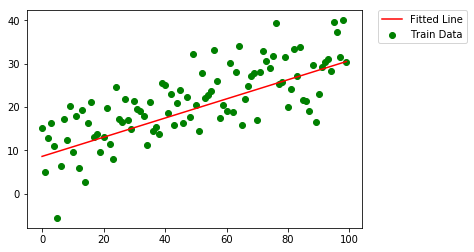

In [5]:


plt.scatter(train_X,train_Y,color='green',label='Train Data')
pred_y=train_X*ww+bb
plt.plot(train_X,pred_y,color='red',label='Fitted Line')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

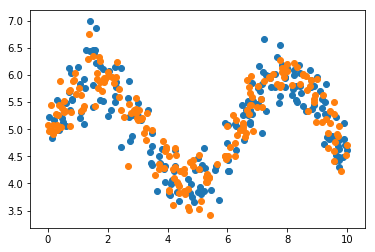

In [6]:
def produce_batch(batch_size, noise=0.3):
    xs = np.random.random(size=[batch_size, 1]) * 10
    ys = np.sin(xs) + 5 + np.random.normal(size=[batch_size, 1], scale=noise)
    return [xs.astype(np.float32), ys.astype(np.float32)]

p_train, m_train = produce_batch(200)
p_test, m_test = produce_batch(200)
plt.scatter(p_train, m_train)
plt.scatter(p_test,m_test)
plt.show()

In [7]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

loss = tf.reduce_mean(tf.pow(pred - Y, 2)) / (2 * n_samples)
# Gradient descent
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Initializing the variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(p_train, m_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(loss, feed_dict={X: p_train, Y: m_train})
            print("Epoch:", '%04d' % (epoch + 1), "loss=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
        ww_p = sess.run(W)
        bb_p = sess.run(b)
   
        

Epoch: 0050 loss= 0.055087734 W= 0.934629 b= -1.32623
Epoch: 0100 loss= 0.052674718 W= 0.912216 b= -1.17252
Epoch: 0150 loss= 0.050373077 W= 0.890725 b= -1.02234
Epoch: 0200 loss= 0.048177443 W= 0.869742 b= -0.875656
Epoch: 0250 loss= 0.046083126 W= 0.849251 b= -0.732396
Epoch: 0300 loss= 0.044085301 W= 0.829235 b= -0.592474
Epoch: 0350 loss= 0.042179585 W= 0.809688 b= -0.455816
Epoch: 0400 loss= 0.040361706 W= 0.790597 b= -0.322344
Epoch: 0450 loss= 0.038627647 W= 0.771949 b= -0.191985
Epoch: 0500 loss= 0.036973540 W= 0.753738 b= -0.0646674
Epoch: 0550 loss= 0.035395678 W= 0.73595 b= 0.059681
Epoch: 0600 loss= 0.033890560 W= 0.718578 b= 0.18113
Epoch: 0650 loss= 0.032454833 W= 0.701611 b= 0.299746
Epoch: 0700 loss= 0.031085279 W= 0.68504 b= 0.415596
Epoch: 0750 loss= 0.029778881 W= 0.668855 b= 0.528743
Epoch: 0800 loss= 0.028532673 W= 0.653047 b= 0.639255
Epoch: 0850 loss= 0.027343946 W= 0.637608 b= 0.747186
Epoch: 0900 loss= 0.026210001 W= 0.622531 b= 0.852603
Epoch: 0950 loss= 0.025

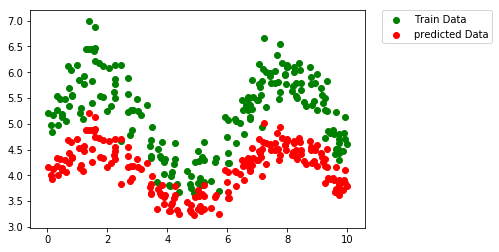

In [8]:
plt.scatter(p_train,m_train,color='green',label='Train Data')
pred_m=m_train*ww_p+bb_p
plt.scatter(p_train,pred_m,color='red',label='predicted Data')
#plt.plot(m_train,pred_m,color='red',label='Fitted Line')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()